# Module 6 - Introduction to Python for Data Analysis
# : Why you will NOT use Excel anymore!

* **Instructor**: Ronnie (Saerom) Lee and Jeff Lockhart
* **Date**: June 8th (Thursday), 2017
* **Packages**: pandas, numpy, matplotlib, statsmodels
    * *pandas*: an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
    
    * *Matplotlib*: a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
    * *Statsmodels*: a Python module that provides classes and functions for the estimation of many different statistical models

## 0. Import relevant packages
* *import* bring in packages of useful tools and functions for you to use
* *import (package_name) as (abbreviation)* lets you refer to the package by the name abbreviation, so you can type less

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# This makes it so that plots show up here in the notebook.
# You do not need it if you are not using a notebook.
%matplotlib inline

from IPython.display import Image

## 1. pandas

### 1.1. How to create, save, and read a dataframe

#### (1) Create a dataframe

In [3]:
data = {'Course' : 'Intro to Big Data',
        'Section' : '6', 
        'Names' : ['Ronnie', 'Jeff', 'Teddy', 'Jerry'],
        'Group' : ['1', '2', '1', '2'],
        'Year' : ['Junior'] * 2 + ['Senior'] * 2,
        'Date' : pd.Timestamp('20160607'),
        'Quiz' : np.array([20, 90, 60, 100], dtype='float64')}

df = pd.DataFrame(data)
df

,Course,Date,Group,Names,Quiz,Section,Year
0,Intro to Big Data,2016-06-07,1,Ronnie,20.0,6,Junior
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior


* Rename a column

In [4]:
df = df.rename(index=str, columns={"Names": "Name"})
df

,Course,Date,Group,Name,Quiz,Section,Year
0,Intro to Big Data,2016-06-07,1,Ronnie,20.0,6,Junior
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior


#### (2) Save the dataframe into a file: We will learn how to save first, since we don't have a file to read yet.
* csv/tsv/txt file (Note: Don't forget to specify the separator!)

In [ ]:
df.to_csv('data.csv', sep = ',', index = False) # if comma separated (csv)
df.to_csv('data.tsv', sep = '\t', index = False) # if tab separated (tsv)
df.to_csv('data.txt', sep = '\t', index = False) # you can also use sep = ',' as in csv files

* Excel file

In [ ]:
df.to_excel('data.xlsx', index_label='label')

#### (3) Read a file into a dataframe
* csv/tsv/txt file (Note: Don't forget to specify the separator!)

In [5]:
df_csv = pd.read_csv('data.csv', sep = ',')
df_csv

,Course,Date,Group,Name,Quiz,Section,Year
0,Intro to Big Data,2016-06-07,1,Ronnie,20.0,6,Junior
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior


In [6]:
df_tsv = pd.read_csv('data.tsv', sep = '\t')
df_tsv

,Course,Date,Group,Name,Quiz,Section,Year
0,Intro to Big Data,2016-06-07,1,Ronnie,20.0,6,Junior
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior


* Excel file

In [7]:
with pd.ExcelFile('data.xlsx') as xlsx:
    df_excel = pd.read_excel(xlsx, sheetname = 'Sheet1')
df_excel

### If there are multiple sheets to read from
# with pd.ExcelFile('data.xlsx') as xlsx:
#    df_sheet1 = pd.read_excel(xlsx, sheetname = 'Sheet1')
#    df_sheet2 = pd.read_excel(xlsx, sheetname = 'Sheet2')

,label,Course,Date,Group,Name,Quiz,Section,Year
0,0,Intro to Big Data,2016-06-07,1,Ronnie,20,6,Junior
1,1,Intro to Big Data,2016-06-07,2,Jeff,90,6,Junior
2,2,Intro to Big Data,2016-06-07,1,Teddy,60,6,Senior
3,3,Intro to Big Data,2016-06-07,2,Jerry,100,6,Senior


* Other formats you can read
    - JSON strings: pd.read_json()
    - HTML tables: pd.read_html()
    - SQL databases: pd.read_sql_table()
    - SAS files: pd.read_sas()
    - Stata files: pd.read_stata()  
    - and many more...

### 1.2. How to add and remove row/column(s) in the dateframe
#### (1) Add row/column(s)
* Rows using *.append()*

In [8]:
# First, create a new dataframe
new_data = {'Course' : 'Intro to Big Data',
        'Section' : '6',
        'Name' : ['Donald', 'Melania'],
        'Group' : '5',
        'Year' : ['Freshman', 'Sophomore'],
        'Date' : pd.Timestamp('20160607'),
        'Quiz' : np.array([5, 85], dtype='float64')}

df2 = pd.DataFrame(new_data)
df2

,Course,Date,Group,Name,Quiz,Section,Year
0,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman
1,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore


In [9]:
# Append the new dataframe to the existing dataframe
df = df.append(df2, ignore_index=True)
df

,Course,Date,Group,Name,Quiz,Section,Year
0,Intro to Big Data,2016-06-07,1,Ronnie,20.0,6,Junior
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior
4,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman
5,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore


* Or an alternative way to add row(s) is to use *pd.concat()*

In [10]:
df = pd.concat([df, df2], axis = 0, ignore_index = True)    # If axis = 1, then add column
df

,Course,Date,Group,Name,Quiz,Section,Year
0,Intro to Big Data,2016-06-07,1,Ronnie,20.0,6,Junior
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior
4,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman
5,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore
6,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman
7,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore


* Columns

In [11]:
df['Assignment'] = np.array([45, 85, 50, 90, 10, 70, 10, 70], dtype='float64')
df

,Course,Date,Group,Name,Quiz,Section,Year,Assignment
0,Intro to Big Data,2016-06-07,1,Ronnie,20.0,6,Junior,45.0
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior,85.0
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior,50.0
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior,90.0
4,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman,10.0
5,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore,70.0
6,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman,10.0
7,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore,70.0


#### (3) Remove rows, columns, and duplicates
* Rows (by index)

In [14]:
df.drop(0)

,Course,Date,Group,Name,Quiz,Section,Year,Assignment
1,Intro to Big Data,2016-06-07,2,Jeff,90.0,6,Junior,85.0
2,Intro to Big Data,2016-06-07,1,Teddy,60.0,6,Senior,50.0
3,Intro to Big Data,2016-06-07,2,Jerry,100.0,6,Senior,90.0
4,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman,10.0
5,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore,70.0
6,Intro to Big Data,2016-06-07,5,Donald,5.0,6,Freshman,10.0
7,Intro to Big Data,2016-06-07,5,Melania,85.0,6,Sophomore,70.0


* Columns

In [15]:
df = df.drop('Date', axis = 1)    
# Note: axis = 1 denotes that we are referring to a column, not a row
df

,Course,Group,Name,Quiz,Section,Year,Assignment
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0
6,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0
7,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0


* Duplicates

In [16]:
# First, in order to check whether there are any duplicates
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
dtype: bool

In [17]:
# If there are duplicates, then run the following code
df = df.drop_duplicates()
df

,Course,Group,Name,Quiz,Section,Year,Assignment
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0


### 1.3. Merge two dataframes
* **Q.** Assume that the students were assigned to groups. For the term project, each group is required to do a presentation and submit a report. Suppose that you graded the presentations and the reports as the following. Create a dataframe with the following information:
    - Group 1: 
        - Presentation: 80
        - Report: 60
    - Group 2:
        - Presentation: 90
        - Report: 80
    - Group 3:
        - Presentation: 100
        - Report: 70
    - Group 4:
        - Presentation: 50
        - Report: 30

In [18]:
term_project = {'Group' : ['1', '2', '3', '4'],
                'Presentation': [80.0, 90., 100., 50.],
                'Report' : np.array([60, 80, 70, 30], dtype='float64')}

df3 = pd.DataFrame(term_project)
df3

,Group,Presentation,Report
0,1,80.0,60.0
1,2,90.0,80.0
2,3,100.0,70.0
3,4,50.0,30.0


In [19]:
df

,Course,Group,Name,Quiz,Section,Year,Assignment
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0


* Rather than putting in the scores one by one, we can simply *merge* the two tables.

In [20]:
pd.merge(df, df3, on = 'Group')

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
2,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0


* **Q.** OOPS! We lost The Donald and Melania! What went wrong?


* **Q.** How should we merge the data in order to keep The Donald and Melania?
    * Important parameter: how = {'left', 'right', 'outer', 'inner'}
        - **inner** (*default*): use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys
        - **outer**: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically
        - **left**: use only keys from left frame, similar to a SQL left outer join; preserve key order
        - **right**: use only keys from right frame, similar to a SQL right outer join; preserve key order
    
* **Q.** Which one of these should we set *how* as?

In [21]:
pd.merge(df, df3, how = 'left', on = 'Group')

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN


* **Q.** How would the dataframe look like if we set *how = right* or *how = outer*?

In [22]:
pd.merge(df, df3, how = 'right', on = 'Group')

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
2,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,NaN,3,NaN,NaN,NaN,NaN,NaN,100.0,70.0
5,NaN,4,NaN,NaN,NaN,NaN,NaN,50.0,30.0


In [23]:
pd.merge(df, df3, how = 'outer', on = 'Group')

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
2,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN
6,NaN,3,NaN,NaN,NaN,NaN,NaN,100.0,70.0
7,NaN,4,NaN,NaN,NaN,NaN,NaN,50.0,30.0


* Thus, the right way to merge the two dataframes is

In [24]:
df = pd.merge(df, df3, how = 'left', on = 'Group')
df

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN


### 1.4. Check what's in the dataframe
#### (1) See the top and bottom rows of the dataframe

In [25]:
nRows = 3    # The number of rows to show
df.head(nRows)

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0


In [26]:
df.tail(nRows)

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN


#### (2) Display the index, columns, and the underlying data

In [27]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [28]:
df.columns

Index(['Course', 'Group', 'Name', 'Quiz', 'Section', 'Year', 'Assignment',
       'Presentation', 'Report'],
      dtype='object')

In [29]:
df.values

array([['Intro to Big Data', '1', 'Ronnie', 20.0, '6', 'Junior', 45.0,
        80.0, 60.0],
       ['Intro to Big Data', '2', 'Jeff', 90.0, '6', 'Junior', 85.0, 90.0,
        80.0],
       ['Intro to Big Data', '1', 'Teddy', 60.0, '6', 'Senior', 50.0, 80.0,
        60.0],
       ['Intro to Big Data', '2', 'Jerry', 100.0, '6', 'Senior', 90.0,
        90.0, 80.0],
       ['Intro to Big Data', '5', 'Donald', 5.0, '6', 'Freshman', 10.0,
        nan, nan],
       ['Intro to Big Data', '5', 'Melania', 85.0, '6', 'Sophomore', 70.0,
        nan, nan]], dtype=object)

#### (3) Sort by values

In [30]:
df.sort_values(by='Quiz')   # Ascending order

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0


In [31]:
df.sort_values(by='Quiz', ascending=False)    # Descending order

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN


* **Q.** What would happen if we sort a column which has a missing value (i.e., NaN)?

In [32]:
df.sort_values(by='Report', ascending=False)    # Descending order

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN


#### (4) Search for a value

In [33]:
df.where(df['Assignment'] > 50)

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN


* For specific column

In [34]:
df['Name'].where(df['Assignment'] > 50)

0        NaN
1       Jeff
2        NaN
3      Jerry
4        NaN
5    Melania
Name: Name, dtype: object

* **Q.** How can we count the number of students who got 'Assignment' higher than 50?

In [35]:
df['Name'].where(df['Assignment'] > 50).count()

3

#### (5) Select
* Column(s)

In [36]:
df['Assignment']

0    45.0
1    85.0
2    50.0
3    90.0
4    10.0
5    70.0
Name: Assignment, dtype: float64

* Row(s)

In [37]:
df[0:3]

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0


* By location

In [38]:
df.loc[0,'Name']

'Ronnie'

In [39]:
df.loc[0,['Assignment','Quiz']]

Assignment    45
Quiz          20
Name: 0, dtype: object

* Using a condition

In [40]:
df[df['Assignment'] > 50]

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN


In [41]:
df[df['Year'].isin(['Junior'])]

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0


### 1.5. Missing data
* Let's first take a look at what we have as our dataframe

In [42]:
df

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,NaN,NaN
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,NaN,NaN


#### (1) Check whether there are any missing data

In [96]:
# pd.isnull(df)
df.isnull()

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report,log_Report,sqrt_Report,Total
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False


* If the dataframe is large in dimension, it would be NOT be easy to see whether there are any 'True's
    
$\rightarrow$ An easier way to check is to use

In [44]:
pd.isnull(df).sum()

Course          0
Group           0
Name            0
Quiz            0
Section         0
Year            0
Assignment      0
Presentation    2
Report          2
dtype: int64

#### (2) [Option 1] Drop row/column(s) with missing data
* Drop row(s)

In [45]:
df.dropna(how='any', axis = 0)

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0


* Drop column(s)

In [46]:
df.dropna(how='any', axis = 1)

,Course,Group,Name,Quiz,Section,Year,Assignment
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0


#### (3) [Option 2] Fill in missing values
* Fill in ALL missing data with a single value

In [49]:
df.fillna(value = 0)

0    80.0
1    90.0
2    80.0
3    90.0
4    30.0
5    20.0
Name: Presentation, dtype: float64

* Fill in a single value by location

In [48]:
df.loc[4,'Presentation'] = 30
df.loc[5,'Presentation'] = 20
df.loc[4,'Report'] = 60
df.loc[5,'Report'] = 70
df

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,30.0,60.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,20.0,70.0


### 1.6. Basic statistics

In [50]:
df

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,30.0,60.0
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,20.0,70.0


#### (1) Describe shows a quick statistic summary of your data

In [51]:
df.describe()

,Quiz,Assignment,Presentation,Report
count,6.000000,6.000000,6.000000,6.000000
mean,60.000000,58.333333,65.000000,68.333333
std,39.370039,29.776949,31.464265,9.831921
min,5.000000,10.000000,20.000000,60.000000
25%,30.000000,46.250000,42.500000,60.000000
50%,72.500000,60.000000,80.000000,65.000000
75%,88.750000,81.250000,87.500000,77.500000
max,100.000000,90.000000,90.000000,80.000000


* **Q.** EWW, IT'S UGLY WITH TOO MANY ZEROS! How can we make this more prettier?

In [52]:
df.describe().round(2)

,Quiz,Assignment,Presentation,Report
count,6.00,6.00,6.00,6.00
mean,60.00,58.33,65.00,68.33
std,39.37,29.78,31.46,9.83
min,5.00,10.00,20.00,60.00
25%,30.00,46.25,42.50,60.00
50%,72.50,60.00,80.00,65.00
75%,88.75,81.25,87.50,77.50
max,100.00,90.00,90.00,80.00


####  (2) Caculate
* Mean

In [53]:
df.mean().round(2)

Quiz            60.00
Assignment      58.33
Presentation    65.00
Report          68.33
dtype: float64

* Median

In [54]:
df.median().round(2)

Quiz            72.5
Assignment      60.0
Presentation    80.0
Report          65.0
dtype: float64

* Min/Max

In [55]:
df['Report'].min().round(2)

60.0

In [56]:
df['Report'].max().round(2)

80.0

* Variance

In [57]:
df.var().round(2)

Quiz            1550.00
Assignment       886.67
Presentation     990.00
Report            96.67
dtype: float64

* Correlation

In [58]:
df.corr().round(2)

,Quiz,Assignment,Presentation,Report
Quiz,1.00,0.95,0.31,0.85
Assignment,0.95,1.00,0.49,0.88
Presentation,0.31,0.49,1.00,0.36
Report,0.85,0.88,0.36,1.00


#### (3) Grouping: a process involving one or more of the following steps
* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [59]:
df.groupby('Group').mean()

,Quiz,Assignment,Presentation,Report
Group,,,,
1,40.0,47.5,80.0,60.0
2,95.0,87.5,90.0,80.0
5,45.0,40.0,25.0,65.0


* **Q.** How can we group by 'Group' and 'Year'?

In [60]:
df.groupby(['Group', 'Year']).mean()

Quiz  Assignment  Presentation  Report
Group Year                                              
1     Junior      20.0        45.0          80.0    60.0
      Senior      60.0        50.0          80.0    60.0
2     Junior      90.0        85.0          90.0    80.0
      Senior     100.0        90.0          90.0    80.0
5     Freshman     5.0        10.0          30.0    60.0
      Sophomore   85.0        70.0          20.0    70.0

#### (4) Pivot tables

In [61]:
pd.pivot_table(df, values='Report', index=['Year'], columns=['Group'])

Group,1,2,5
Year,,,
Freshman,NaN,NaN,60.0
Junior,60.0,80.0,NaN
Senior,60.0,80.0,NaN
Sophomore,NaN,NaN,70.0


### 1.4. Basic column operations
* Logarithm
    - Natural logarithm: np.log()
    - The base 10 logarithm: np.log10()
    - The base 2 logarithm: np.log2()

In [62]:
df['log_Report'] = np.log(df['Report'])
df

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report,log_Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0,4.094345
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0,4.382027
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0,4.094345
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0,4.382027
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,30.0,60.0,4.094345
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,20.0,70.0,4.248495


* Square root

In [63]:
df['sqrt_Report'] = np.sqrt(df['Report'])
df

,Course,Group,Name,Quiz,Section,Year,Assignment,Presentation,Report,log_Report,sqrt_Report
0,Intro to Big Data,1,Ronnie,20.0,6,Junior,45.0,80.0,60.0,4.094345,7.745967
1,Intro to Big Data,2,Jeff,90.0,6,Junior,85.0,90.0,80.0,4.382027,8.944272
2,Intro to Big Data,1,Teddy,60.0,6,Senior,50.0,80.0,60.0,4.094345,7.745967
3,Intro to Big Data,2,Jerry,100.0,6,Senior,90.0,90.0,80.0,4.382027,8.944272
4,Intro to Big Data,5,Donald,5.0,6,Freshman,10.0,30.0,60.0,4.094345,7.745967
5,Intro to Big Data,5,Melania,85.0,6,Sophomore,70.0,20.0,70.0,4.248495,8.366600


* **Q.** Suppose that the evaluation is based on the following weights
    - Quiz: 15%
    - Assignment: 20%
    - Presentation: 25%
    - Report: 40%

How can we make a new column 'Total' which calculate the weighted sum and rank the students by 'Total' in descending order?

In [68]:
df['Total'] = 0.15 * df['Quiz'] + 0.2 * df['Assignment'] + 0.25 * df['Presentation'] + 0.4 * df['Report']
df.sort_values(by='Total', ascending=False)['Name']

3      Jerry
1       Jeff
2      Teddy
5    Melania
0     Ronnie
4     Donald
Name: Name, dtype: object

### 1.7. Application: Let's apply these tools to a set of real data
#### Q. Read the datafile 'Salaries.csv' (separator = comma) as the variable 'salaries' and show its FIRST 10 rows

In [2]:
salaries = pd.read_csv('./MLB/Salaries.csv', sep = ',')
salaries.head(10)

NameError: name 'pd' is not defined

#### Q. Read the datafile 'Batting.xlsx' (sheetname = 'Batting') as the variable 'batting' and show its LAST 5 rows

In [70]:
with pd.ExcelFile('Batting.xlsx') as f:
    batting = pd.read_excel(f, sheetname = 'Batting')
batting.tail(5)

,player,year,team,batting_G,batting_AB,batting_R,batting_H,batting_2B,batting_3B,batting_HR,batting_RBI,batting_SB,batting_CS,batting_BB,batting_SO,batting_IBB,batting_HBP,batting_SH,batting_SF,batting_GIDP
99841,zieglbr01,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99842,zimmejo02,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0
99843,zimmery01,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0
99844,zobribe01,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0
99845,zuninmi01,2014,SEA,131,438.0,51.0,87.0,20.0,2.0,22.0,60.0,0.0,3.0,17.0,158.0,1.0,17.0,0.0,4.0,12.0


#### Q. Create a variable 'data' by LEFT MERGING 'salaries' and 'batting' based on 'player',  'year', and  'team' and show the FIRST 7 rows

In [71]:
data = pd.merge(salaries, batting, how='left', on = ['player', 'year', 'team'])
data.head(7)

,year,team,league,player,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,...,batting_RBI,batting_SB,batting_CS,batting_BB,batting_SO,batting_IBB,batting_HBP,batting_SH,batting_SF,batting_GIDP
0,1985,ATL,NL,barkele01,870000,20.0,17.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1985,ATL,NL,bedrost01,550000,37.0,64.0,3.0,5.0,0.0,...,1.0,0.0,0.0,1.0,22.0,0.0,0.0,6.0,0.0,0.0
2,1985,ATL,NL,benedbr01,545000,70.0,208.0,12.0,42.0,6.0,...,20.0,0.0,1.0,22.0,12.0,1.0,1.0,4.0,2.0,8.0
3,1985,ATL,NL,campri01,633333,66.0,13.0,1.0,3.0,0.0,...,2.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0
4,1985,ATL,NL,ceronri01,625000,96.0,282.0,15.0,61.0,9.0,...,25.0,0.0,3.0,29.0,25.0,1.0,1.0,0.0,4.0,15.0
5,1985,ATL,NL,chambch01,800000,101.0,170.0,16.0,40.0,7.0,...,21.0,0.0,0.0,18.0,22.0,4.0,0.0,0.0,1.0,5.0
6,1985,ATL,NL,dedmoje01,150000,60.0,9.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0


#### Q. Read the STATA datafile 'Pitching.dta' as the variable 'pitching' and show its LAST 4 rows

In [72]:
pitching  = pd.read_stata('./MLB/Pitching.dta')
pitching.tail(4)

,player,year,team,pitching_w,pitching_l,pitching_g,pitching_gs,pitching_cg,pitching_sho,pitching_sv,...,pitching_ibb,pitching_wp,pitching_hbp,pitching_bk,pitching_bfp,pitching_gf,pitching_r,pitching_sh,pitching_sf,pitching_gidp
43326,youngch03,2014,SEA,12,9,30,29,0,0,0,...,3.0,5.0,3.0,1,688.0,0.0,70,4.0,9.0,6.0
43327,zeidjo01,2014,HOU,0,0,23,0,0,0,0,...,1.0,1.0,1.0,0,98.0,6.0,18,1.0,2.0,1.0
43328,zieglbr01,2014,ARI,5,3,68,0,0,0,1,...,6.0,0.0,3.0,0,281.0,11.0,29,2.0,4.0,9.0
43329,zimmejo02,2014,WAS,14,5,32,32,3,2,0,...,0.0,4.0,6.0,0,800.0,0.0,67,5.0,3.0,11.0


#### Q. FOR SIMPLICITY, drop all columns with missing values

In [73]:
pitching = pitching.dropna(how='any', axis = 1)
pitching.head()

,player,year,team,pitching_w,pitching_l,pitching_g,pitching_gs,pitching_cg,pitching_sho,pitching_sv,pitching_h,pitching_er,pitching_hr,pitching_bb,pitching_so,pitching_bk,pitching_r
0,bechtge01,1871,PH1,1,2,3,3,2,0,0,43,23,0,11,1,0,42
1,brainas01,1871,WS3,12,15,30,30,30,0,0,361,132,4,37,13,0,292
2,fergubo01,1871,NY2,0,0,1,0,0,0,0,8,3,0,0,0,0,9
3,fishech01,1871,RC1,4,16,24,24,22,1,0,295,103,3,31,15,0,257
4,fleetfr01,1871,NY2,0,1,1,1,1,0,0,20,10,0,3,0,0,21


#### Q. LEFT MERGE 'data' and 'pitching' based on 'player', 'year', and 'team' and show the top 5 rows

In [74]:
data = pd.merge(data, pitching, how='left', on = ['player', 'year', 'team'])
data.head(5)

,year,team,league,player,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,...,pitching_cg,pitching_sho,pitching_sv,pitching_h,pitching_er,pitching_hr,pitching_bb,pitching_so,pitching_bk,pitching_r
0,1985,ATL,NL,barkele01,870000,20.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,84.0,52.0,10.0,37.0,47.0,0.0,55.0
1,1985,ATL,NL,bedrost01,550000,37.0,64.0,3.0,5.0,0.0,...,0.0,0.0,0.0,198.0,88.0,17.0,111.0,134.0,0.0,101.0
2,1985,ATL,NL,benedbr01,545000,70.0,208.0,12.0,42.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,ATL,NL,campri01,633333,66.0,13.0,1.0,3.0,0.0,...,0.0,0.0,3.0,130.0,56.0,8.0,61.0,49.0,0.0,72.0
4,1985,ATL,NL,ceronri01,625000,96.0,282.0,15.0,61.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Q. Check whether there are any missing values in 'data' 

In [97]:
# pd.isnull(data).sum()
data.isnull().sum()

year            0
team            0
league          0
player          0
salary          0
batting_G       0
batting_AB      0
batting_R       0
batting_H       0
batting_2B      0
batting_3B      0
batting_HR      0
batting_RBI     0
batting_SB      0
batting_CS      0
batting_BB      0
batting_SO      0
batting_IBB     0
batting_HBP     0
batting_SH      0
batting_SF      0
batting_GIDP    0
pitching_w      0
pitching_l      0
pitching_g      0
pitching_gs     0
pitching_cg     0
pitching_sho    0
pitching_sv     0
pitching_h      0
               ..
log_salary      0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009      

#### Q. FOR SIMPLICITY, fill in the missing values with zeros and re-check whether there are any missing values

In [76]:
data = data.fillna(value = 0.)
pd.isnull(data).sum()

year            0
team            0
league          0
player          0
salary          0
batting_G       0
batting_AB      0
batting_R       0
batting_H       0
batting_2B      0
batting_3B      0
batting_HR      0
batting_RBI     0
batting_SB      0
batting_CS      0
batting_BB      0
batting_SO      0
batting_IBB     0
batting_HBP     0
batting_SH      0
batting_SF      0
batting_GIDP    0
pitching_w      0
pitching_l      0
pitching_g      0
pitching_gs     0
pitching_cg     0
pitching_sho    0
pitching_sv     0
pitching_h      0
pitching_er     0
pitching_hr     0
pitching_bb     0
pitching_so     0
pitching_bk     0
pitching_r      0
dtype: int64

#### Q. Read the csv files 'Basic.csv' (separator = comma) and INNER MERGE with 'data' based on 'player'

In [77]:
basic = pd.read_csv('./MLB/Basic.csv', sep = ',')
data = pd.merge(data, basic, how='inner', on = ['player'])
data.head()

,year,team,league,player,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,...,birthDay,birthCountry,birthState,birthCity,nameGiven,weight,height,bats,throws,debut
0,1985,ATL,NL,barkele01,870000,20.0,17.0,0.0,0.0,0.0,...,27.0,USA,KY,Fort Knox,Leonard Harold,225.0,77.0,R,R,9/14/1976
1,1986,ATL,NL,barkele01,880000,0.0,0.0,0.0,0.0,0.0,...,27.0,USA,KY,Fort Knox,Leonard Harold,225.0,77.0,R,R,9/14/1976
2,1987,ATL,NL,barkele01,890000,0.0,0.0,0.0,0.0,0.0,...,27.0,USA,KY,Fort Knox,Leonard Harold,225.0,77.0,R,R,9/14/1976
3,1987,ML4,AL,barkele01,72500,11.0,0.0,0.0,0.0,0.0,...,27.0,USA,KY,Fort Knox,Leonard Harold,225.0,77.0,R,R,9/14/1976
4,1988,ATL,NL,barkele01,900000,0.0,0.0,0.0,0.0,0.0,...,27.0,USA,KY,Fort Knox,Leonard Harold,225.0,77.0,R,R,9/14/1976


#### Q. Read the csv files 'Teams.csv' (separator = comma) and INNER MERGE with 'data' based on 'team' and 'year

In [78]:
teams = pd.read_csv('./MLB/Teams.csv', sep = ',')
data = pd.merge(data, teams, how='left', on = ['team', 'year'])
data.head()

,year,team,league,player,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1985,ATL,NL,barkele01,870000,20.0,17.0,0.0,0.0,0.0,...,197.0,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105.0,106.0,ATL,ATL,ATL
1,1986,ATL,NL,barkele01,880000,0.0,0.0,0.0,0.0,0.0,...,181.0,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1387181.0,105.0,106.0,ATL,ATL,ATL
2,1987,ATL,NL,barkele01,890000,0.0,0.0,0.0,0.0,0.0,...,170.0,0.98,Atlanta Braves,Atlanta-Fulton County Stadium,1217402.0,104.0,106.0,ATL,ATL,ATL
3,1987,ML4,AL,barkele01,72500,11.0,0.0,0.0,0.0,0.0,...,155.0,0.97,Milwaukee Brewers,County Stadium,1909244.0,103.0,103.0,MIL,MIL,MIL
4,1988,ATL,NL,barkele01,900000,0.0,0.0,0.0,0.0,0.0,...,138.0,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,848089.0,104.0,106.0,ATL,ATL,ATL


#### Q. Save the dataframe 'data' as a tsv file, 'baseball.tsv'

In [ ]:
data.to_csv('baseball.tsv', sep = '\t', index = False)

#### Q. Create a new column 'log_salary' by putting a natural log on ('salary' + 1)

In [79]:
data['log_salary'] = np.log(data['salary'] + 1)
data.describe().round(2)

,year,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,batting_3B,batting_HR,batting_RBI,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,log_salary
count,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,...,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24768.00
mean,1999.89,1931937.60,65.10,166.23,22.49,43.92,8.48,0.94,4.90,21.46,...,157.03,529.74,1026.24,110.07,147.67,0.98,2284469.46,100.19,100.22,13.50
std,8.32,3189278.23,48.48,203.47,30.89,57.48,11.67,1.88,8.56,30.46,...,30.63,70.75,149.49,19.96,19.86,0.01,726816.30,4.88,4.91,1.38
min,1985.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,76.00,288.00,560.00,54.00,82.00,0.97,642745.00,88.00,88.00,0.00
25%,1993.00,260000.00,27.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,135.00,482.00,926.00,97.00,135.00,0.98,1748680.00,97.00,97.00,12.47
50%,2000.00,525000.00,53.00,57.00,4.00,9.00,1.00,0.00,0.00,4.00,...,158.00,529.00,1027.00,108.00,148.00,0.98,2219110.00,100.00,100.00,13.17
75%,2007.00,2183333.00,104.00,317.00,39.00,81.25,15.00,1.00,6.00,36.00,...,177.00,575.00,1132.00,124.00,161.00,0.98,2820530.00,102.00,103.00,14.60
max,2014.00,33000000.00,163.00,716.00,152.00,262.00,59.00,23.00,73.00,165.00,...,241.00,784.00,1450.00,179.00,204.00,0.99,4483350.00,129.00,129.00,17.31


#### Q. Examine summary statistics

In [80]:
data.describe().round(2)

,year,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,batting_3B,batting_HR,batting_RBI,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,log_salary
count,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,24768.00,...,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24717.00,24768.00
mean,1999.89,1931937.60,65.10,166.23,22.49,43.92,8.48,0.94,4.90,21.46,...,157.03,529.74,1026.24,110.07,147.67,0.98,2284469.46,100.19,100.22,13.50
std,8.32,3189278.23,48.48,203.47,30.89,57.48,11.67,1.88,8.56,30.46,...,30.63,70.75,149.49,19.96,19.86,0.01,726816.30,4.88,4.91,1.38
min,1985.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,76.00,288.00,560.00,54.00,82.00,0.97,642745.00,88.00,88.00,0.00
25%,1993.00,260000.00,27.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,135.00,482.00,926.00,97.00,135.00,0.98,1748680.00,97.00,97.00,12.47
50%,2000.00,525000.00,53.00,57.00,4.00,9.00,1.00,0.00,0.00,4.00,...,158.00,529.00,1027.00,108.00,148.00,0.98,2219110.00,100.00,100.00,13.17
75%,2007.00,2183333.00,104.00,317.00,39.00,81.25,15.00,1.00,6.00,36.00,...,177.00,575.00,1132.00,124.00,161.00,0.98,2820530.00,102.00,103.00,14.60
max,2014.00,33000000.00,163.00,716.00,152.00,262.00,59.00,23.00,73.00,165.00,...,241.00,784.00,1450.00,179.00,204.00,0.99,4483350.00,129.00,129.00,17.31


#### Q. Examine statistics grouping by 'team' and show the FIRST 5 rows

In [81]:
data.groupby('team').mean().round(2).head()

,year,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,batting_3B,batting_HR,batting_RBI,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,log_salary
team,,,,,,,,,,,,,,,,,,,,,
ANA,2000.30,1895109.20,64.66,166.53,23.56,45.60,8.62,0.87,5.09,22.62,...,183.20,573.57,989.37,107.53,148.26,0.98,2392521.59,100.18,100.24,13.59
ARI,2005.65,2500442.86,65.26,168.21,22.56,43.62,8.99,1.16,5.23,21.60,...,174.98,503.30,1163.67,101.51,140.38,0.98,2541094.64,104.98,105.11,14.00
ATL,1999.28,2184393.02,67.04,168.57,22.53,43.95,8.35,0.84,5.25,21.65,...,129.95,507.22,1068.68,113.40,144.01,0.98,2424966.92,101.92,101.30,13.58
BAL,1999.25,1846206.16,64.19,165.43,22.34,43.71,8.23,0.65,5.43,21.58,...,176.47,552.77,957.36,96.72,158.08,0.98,2632389.69,99.01,99.29,13.54
BOS,1999.72,2754280.30,64.20,167.88,24.63,46.41,9.90,0.86,5.23,23.54,...,150.78,518.88,1082.49,109.42,144.75,0.98,2584700.67,104.27,103.71,13.88


#### Q. Examine statistics grouping by 'team' AND 'year' and show the FIRST 20 rows

In [82]:
data.groupby(['team', 'year']).mean().round(2).head(20)

salary  batting_G  batting_AB  batting_R  batting_H  batting_2B  \
team year                                                                     
ANA  1997  1004370      61.48      156.77      23.00      43.29        7.71   
     1998  1214147      58.76      151.29      21.38      41.18        8.53   
     1999  1384704      53.15      133.35      17.40      34.35        6.00   
     2000  1715472      66.03      175.17      27.20      49.73        9.67   
     2001  1584505      69.07      178.53      22.40      47.10        8.97   
     2002  2204345      73.93      195.86      29.39      55.29       11.43   
     2003  2927098      69.44      168.70      22.00      45.15        8.85   
     2004  3723506      72.00      190.52      28.85      54.59        8.96   
ARI  1998   898527      55.81      145.67      17.86      36.17        6.47   
     1999  2020705      59.82      164.74      26.50      45.53        8.38   
     2000  2799284      58.77      153.94      22.16      40.45        7.90   
     2001  3038678      66.86      172.18      24.79      46.46        9.11   
     2002  3115757      64.82      162.76      24.06      43.70        8.39   
     2003  3226280      67.76      161.32      20.08      41.68        8.88   
     2004  2406232      49.28      121.14      14.59      31.48        6.62   
     2005  2308487      73.93      194.00      24.70      50.19       10.44   
     2006  2295547      74.00      194.27      27.12      51.85       11.31   
     2007  1859555      68.39      162.14      20.89      40.18        8.50   
     2008  2364382      73.25      181.71      24.29      45.93       10.82   
     2009  2812141      64.31      174.42      22.92      44.15        9.73   

           batting_3B  batting_HR  batting_RBI  batting_SB     ...        HRA  \
team year                                                      ...              
ANA  1997        0.71        4.77        22.35        3.26     ...      202.0   
     1998        0.74        4.18        20.21        2.32     ...      164.0   
     1999        0.52        3.90        16.48        1.75     ...      177.0   
     2000        1.00        7.67        26.80        2.97     ...      228.0   
     2001        0.83        5.00        21.57        3.83     ...      168.0   
     2002        1.11        5.32        28.07        4.00     ...      169.0   
     2003        0.85        4.89        21.89        3.37     ...      190.0   
     2004        1.37        5.56        26.63        4.85     ...      170.0   
ARI  1998        1.25        4.28        16.86        1.89     ...      188.0   
     1999        1.35        6.29        25.12        4.00     ...      176.0   
     2000        1.00        5.23        21.10        2.74     ...      190.0   
     2001        0.96        7.07        25.43        2.18     ...      195.0   
     2002        1.21        4.94        23.39        2.79     ...      170.0   
     2003        1.28        3.92        19.96        2.52     ...      150.0   
     2004        0.83        3.17        13.79        1.00     ...      197.0   
     2005        1.00        6.78        23.85        2.48     ...      193.0   
     2006        1.04        5.54        25.54        2.73     ...      168.0   
     2007        1.04        5.21        20.32        3.71     ...      169.0   
     2008        1.68        5.25        22.71        2.00     ...      147.0   
     2009        1.23        5.96        21.54        3.54     ...      168.0   

             BBA     SOA      E     DP    FP  attendance    BPF    PPF  \
team year                                                                
ANA  1997  605.0  1050.0  126.0  140.0  0.98   1767330.0  102.0  102.0   
     1998  630.0  1091.0  106.0  146.0  0.98   2519280.0  102.0  102.0   
     1999  624.0   877.0  106.0  156.0  0.98   2253123.0   99.0  100.0   
     2000  662.0   846.0  134.0  182.0  0.98   2066982.0  102.0  103.0   
     2001  525.0   947.0  103.0  142.0  0.98  

#### Q. [TRY GOOGLING] Create dummy variables for 'year'

In [83]:
year_dummies = pd.get_dummies(data['year'],  drop_first = True)
year_dummies.head()

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Concatenate the two dataframes

In [84]:
data = pd.concat([data, year_dummies], axis = 1)
data.head()

,year,team,league,player,salary,batting_G,batting_AB,batting_R,batting_H,batting_2B,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,1985,ATL,NL,barkele01,870000,20.0,17.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1986,ATL,NL,barkele01,880000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1987,ATL,NL,barkele01,890000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1987,ML4,AL,barkele01,72500,11.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1988,ATL,NL,barkele01,900000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## 2. matplotlib
### 2.1. Let's plot this data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# This makes it so that plots show up here in the notebook.
# You do not need it if you are not using a notebook.
%matplotlib inline

data = pd.read_csv('baseball.tsv', sep='\t')
data.columns.values

array(['year', 'team', 'league', 'player', 'salary', 'batting_G',
       'batting_AB', 'batting_R', 'batting_H', 'batting_2B', 'batting_3B',
       'batting_HR', 'batting_RBI', 'batting_SB', 'batting_CS',
       'batting_BB', 'batting_SO', 'batting_IBB', 'batting_HBP',
       'batting_SH', 'batting_SF', 'batting_GIDP', 'pitching_w',
       'pitching_l', 'pitching_g', 'pitching_gs', 'pitching_cg',
       'pitching_sho', 'pitching_sv', 'pitching_h', 'pitching_er',
       'pitching_hr', 'pitching_bb', 'pitching_so', 'pitching_bk',
       'pitching_r', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'nameGiven', 'weight', 'height', 'bats',
       'throws', 'debut', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W',
       'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP',
       'FP', 'name', 

### 2.2. Histogram: Histograms and other simple plots are easy

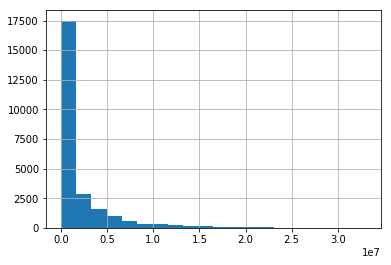

In [5]:
data['salary'].hist(bins=20)

In [7]:
data['log_salary'] = np.log(data['salary'] + 1)

In [9]:
def log2(value):
    result = np.log(value + 1)
    return result

data['log_salary'] = data['salary'].apply(log2)

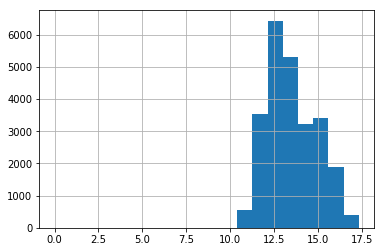

In [11]:
data['log_salary'].hist(bins=20)

### 2.3. Scatter plot: Basic two variable plots like this scatter are easy, too.

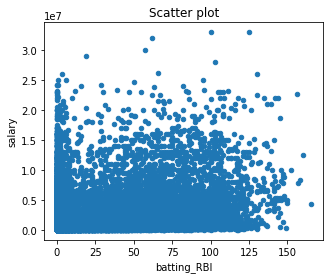

In [13]:
data.plot.scatter(x = 'batting_RBI', 
                  y = 'salary',
                  title = 'Scatter plot',
                  figsize = (5, 4))

### 2.4. Line graph

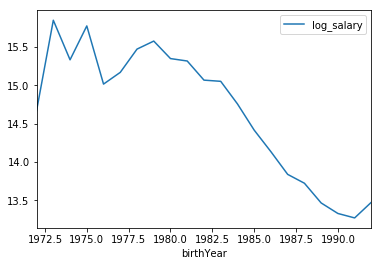

In [14]:
#let's get average salary by year born
last = data[(data['year'] == 2014) & (data['birthYear'] > 1900)]
tmp = last.groupby(by='birthYear').mean()

#And make a line plot of it...
tmp.plot.line(y='log_salary')

* But what if we want to change the formatting?

range(1972, 1993)

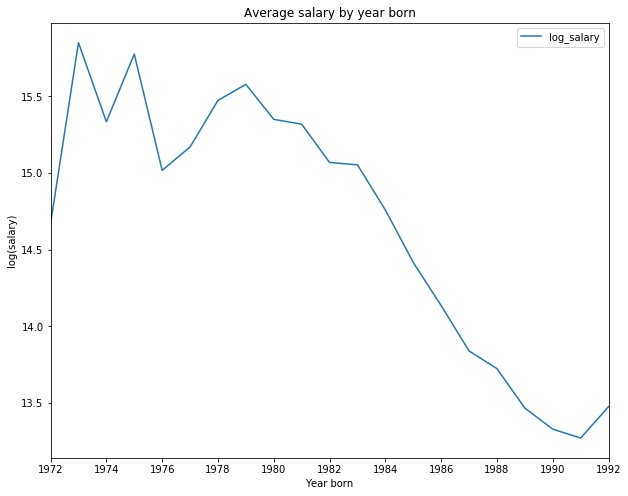

In [17]:
#ax stands for "axis", we'll use this object to change more settings
#we can also specify the image size, in inches, right here with the figsize argument
ax = tmp.plot.line(y='log_salary', figsize=(10,8))

#add a title to the chart
ax.set_title('Average salary by year born')

#label the axes
ax.set_ylabel('log(salary)')
ax.set_xlabel('Year born')

#set the ticks so they're not half years
#The range command makes a list of years starting in 1972 and counting by 2 up to (not including) 1993.
ax.set_xticks(range(1972, 1993, 2))

#show our plot
plt.show()

### 2.5. Bar chart

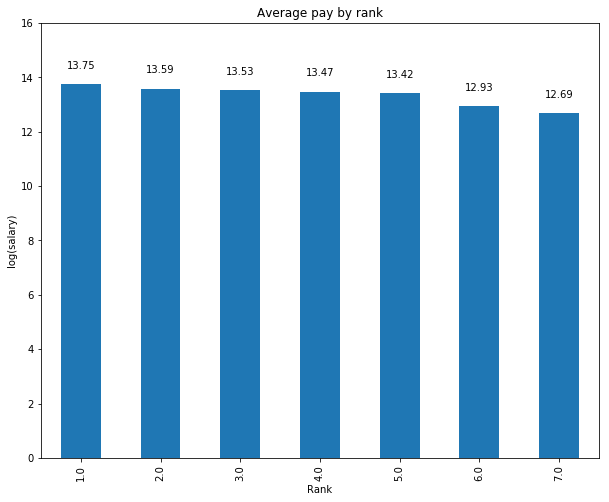

In [18]:
#group our data by rank
tmp = data.groupby(by='Rank').mean()

#plot the mean log salary by rank
ax = tmp['log_salary'].plot.bar(figsize=(10,8))
ax.set_title('Average pay by rank')
ax.set_ylabel('log(salary)')
ax.set_xlabel('Rank')

#set the upper and lower limits of the y axis
ax.set_ylim(ymin=0, ymax=16)

#get the location of the bars (rectangles)
rects = ax.patches
#loop throgh each bar and label it with its value
for rect, label in zip(rects, tmp['log_salary']):
    #find out the height of the bar on the image
    height = rect.get_height()
    l = '{:5.2f}'.format(label)
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, l, ha='center', va='bottom')

plt.show()

* Bar chart with error bars

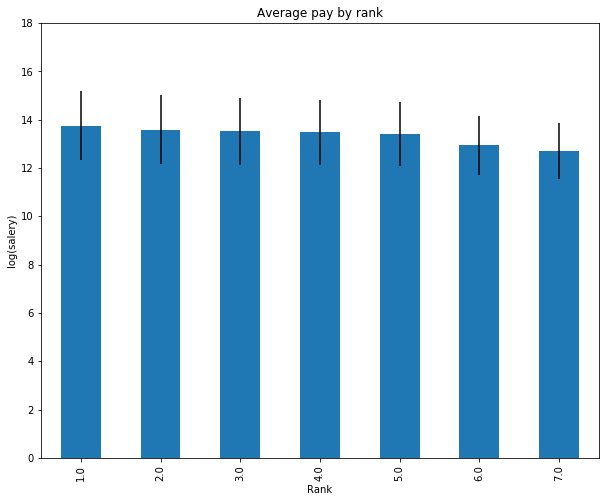

In [19]:
#find the standard deviation instead of the mean when we group by rank
tmp2 = data.groupby(by='Rank').std()
#add the errors to out plotting call 
ax = tmp['log_salary'].plot.bar(yerr=tmp2['log_salary'], figsize=(10,8))
ax.set_title('Average pay by rank')
ax.set_ylabel('log(salery)')
ax.set_xlabel('Rank')

#set the upper and lower limits of the y axis
ax.set_ylim(ymin=0, ymax=18)

plt.show()

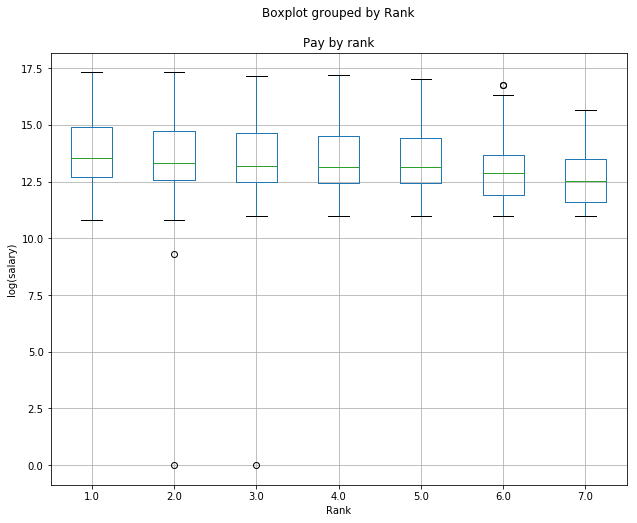

In [20]:
#make a boxplot of salaries, by rank
ax = data.boxplot(column='log_salary', by='Rank', figsize=(10,8))
ax.set_title('Pay by rank')
ax.set_ylabel('log(salary)')
ax.set_xlabel('Rank')

plt.show()

### 2.6. FOR FUN: Now let's make it look like xkcd.com

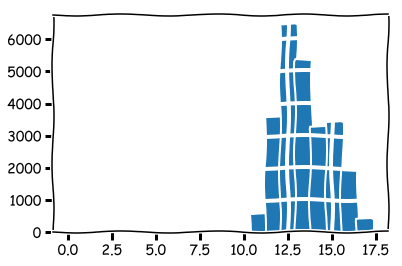

In [25]:
with plt.xkcd():
    data.log_salary.hist(bins=20) 

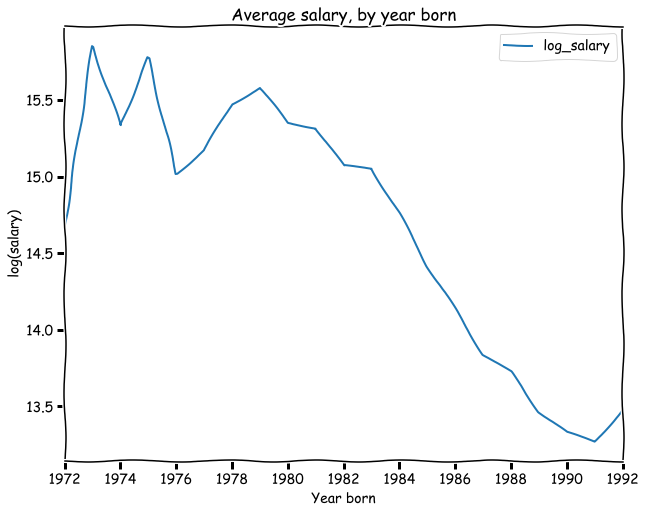

In [26]:
with plt.xkcd():
    tmp = last.groupby(by='birthYear').mean()
    ax = tmp.plot.line(y='log_salary', figsize=(10,8))
    ax.set_title('Average salary, by year born')
    ax.set_ylabel('log(salary)')
    ax.set_xlabel('Year born')
    ax.set_xticks(range(1972, 1993, 2))
    plt.show()

#### In fact, we can use many styles!

In [27]:
plt.style.available

['seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'seaborn-dark',
 'seaborn-poster',
 'fivethirtyeight',
 'seaborn-colorblind',
 'seaborn-deep',
 'classic',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'dark_background',
 'bmh',
 'seaborn-paper',
 'grayscale',
 'seaborn-pastel',
 'ggplot',
 'seaborn-notebook',
 'seaborn-talk']

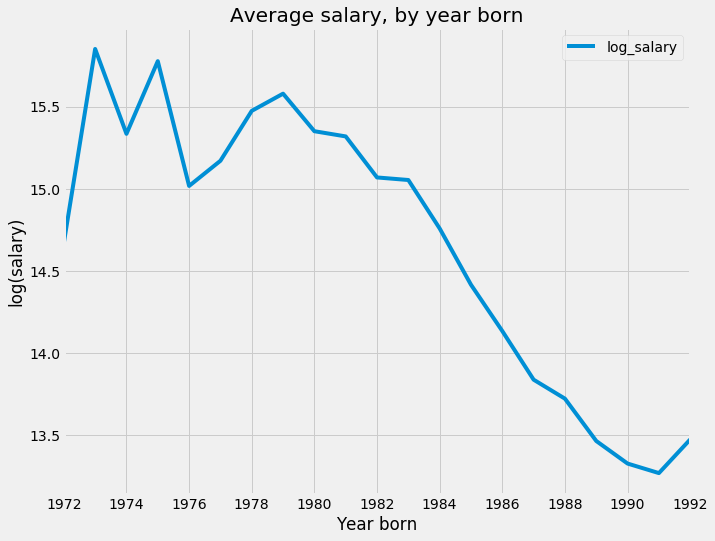

In [28]:
plt.style.use('fivethirtyeight')
ax = tmp.plot.line(y='log_salary', figsize=(10,8))
ax.set_title('Average salary, by year born')
ax.set_ylabel('log(salary)')
ax.set_xlabel('Year born')
ax.set_xticks(range(1972, 1993, 2))
plt.show()

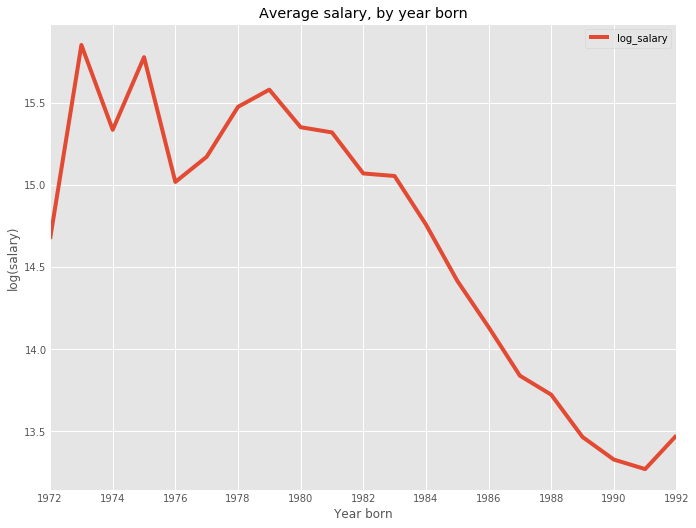

In [29]:
plt.style.use('ggplot')
ax = tmp.plot.line(y='log_salary', figsize=(10,8))
ax.set_title('Average salary, by year born')
ax.set_ylabel('log(salary)')
ax.set_xlabel('Year born')
ax.set_xticks(range(1972, 1993, 2))
plt.show()

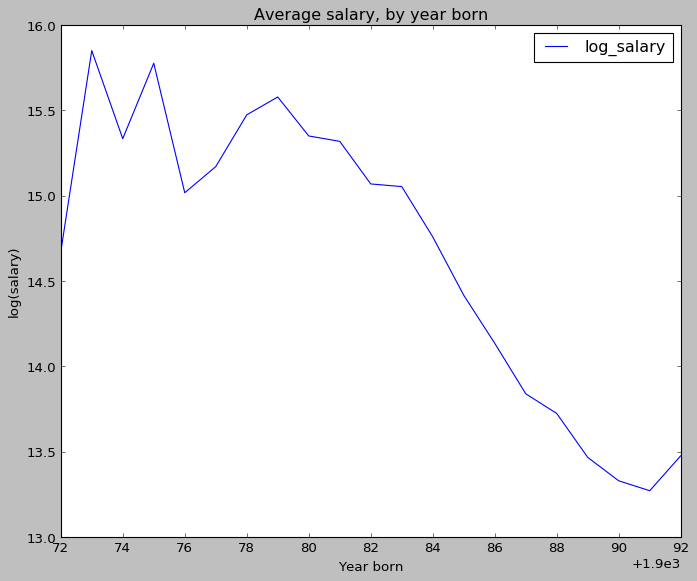

In [30]:
plt.style.use('classic')
ax = tmp.plot.line(y='log_salary', figsize=(10,8))
ax.set_title('Average salary, by year born')
ax.set_ylabel('log(salary)')
ax.set_xlabel('Year born')
ax.set_xticks(range(1972, 1993, 2))
plt.show()

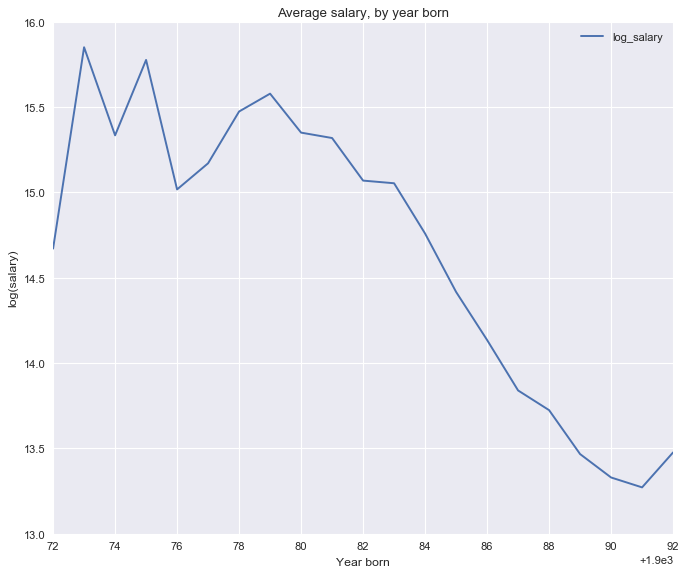

In [31]:
plt.style.use('seaborn')
ax = tmp.plot.line(y='log_salary', figsize=(10,8))
ax.set_title('Average salary, by year born')
ax.set_ylabel('log(salary)')
ax.set_xlabel('Year born')
ax.set_xticks(range(1972, 1993, 2))
plt.show()

## 3. statsmodels: Let's run regressions!

* **Q.** (Linear regression) Let's see whether RBI and ERA explains log_salary

In [32]:
formula = 'log_salary ~ batting_RBI + ERA'
result_ols = smf.ols(formula = formula, data = data).fit()
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1190.
Date:                Thu, 08 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:11:15   Log-Likelihood:                -41942.
No. Observations:               24717   AIC:                         8.389e+04
Df Residuals:                   24714   BIC:                         8.391e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.4260      0.064    210.558      

* **Q.** (Logistic regression) Let's see whether RBI and ERA explains whether the player gets above-average log_salary

In [33]:
data['above_average'] = (data['log_salary'] > data['log_salary'].mean()).astype(float)
data['above_average'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: above_average, dtype: float64

In [34]:
formula = 'above_average ~ batting_RBI + ERA'
result_logit = smf.logit(formula = formula, data = data).fit()
print(result_logit.summary())

Optimization terminated successfully.
         Current function value: 0.655540
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          above_average   No. Observations:                24717
Model:                          Logit   Df Residuals:                    24714
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Jun 2017   Pseudo R-squ.:                 0.04363
Time:                        16:11:45   Log-Likelihood:                -16203.
converged:                       True   LL-Null:                       -16942.
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1677      0.100     -1.672      0.095      -0.364       0.029
batting_RBI     0.0167    

#### In statsmodels, there are many other methods and tools that you can use. For more information, click [here](http://www.statsmodels.org/stable/index.html).

## [Bonus] Other useful packages to know for data analysis

* **Matching strings**: *FuzzyWuzzy*
* **Machine learning**: *sklearn*
* **Neural network (Deep learning)**: *TensorFlow*
* **Social network analysis**: *networkx*

### 1. FuzzyWuzzy
* uses Levenshtein Distance to calculate the differences between sequences

In [35]:
# Import the pacakage
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

c:\users\saerom (ronnie) lee\appdata\local\programs\python\python35\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


* Simple Ratio

In [36]:
fuzz.ratio("This is a test", "This is a test!")

97

* Partial Ratio

In [37]:
fuzz.partial_ratio("this is a test", "this is a test!")

100

* Token Sort Ratio

In [89]:
fuzz.ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear")

91

In [90]:
fuzz.token_sort_ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear")

100

* Token Set Ratio

In [91]:
fuzz.token_sort_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear")

84

In [92]:
fuzz.token_set_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear")

100

* Process

In [93]:
choices = ["Atlanta Falcons", "New York Jets", "New York Giants", "Dallas Cowboys"]
process.extract("new york jets", choices, limit=2)

[('New York Jets', 100), ('New York Giants', 79)]

In [94]:
process.extractOne("cowboys", choices)

('Dallas Cowboys', 90)